In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
from collections import Counter

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('D:/stud_math.csv')

Цель работы - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [2]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
df.shape

(395, 30)

Данные представляют собой таблицу с 395 записями. Каждая запись характеризует одного студента по 30 характеристикам. 

Количественные характеристики:

* age
* absences
* score

Порядковые характеристики:

* famsize
* Medu
* Fedu
* traveltime
* studytime
* failures
* famrel 
* freetime
* goout
* health 

Номинальные характеристики:

* school
* sex
* address
* Pstatus
* Mjob 
* Fjob 
* reason 
* guardian 
* schoolsup 
* famsup 
* paid 
* activities 
* nursery 
* higher 
* internet 
* romantic 



Сделаем все названия столбцов с маленькой буквы 

In [4]:
df.columns = map(str.lower, df.columns)

In [5]:
print(
    f'Большинство столбцов имеют незаполненные значения:\n{df.isnull().sum()}')

Большинство столбцов имеют незаполненные значения:
school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                45
medu                    3
fedu                   24
mjob                   19
fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64


Посмотрим на корреляцию исходных данных в таблице

In [6]:
df.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


Видно, что значения studytime и studytime, granular имеют полную обратную корреляцию. Удаляем "studytime, granular", поскольку он не несет в себе никакой дополнительной информации и никак не сможет добавить точности к модели. 

In [7]:
df = df.drop(columns=['studytime, granular'])

## school

In [8]:
df.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

Столбец содержит аббревиатуру школы, в которой учится ученик. Принимает два значения GP и MS

## sex 

In [9]:
df.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

Столбец содержит пол ученика ('F' - женский, 'M' - мужской)

age 

In [10]:
df.age.value_counts(normalize=True, sort=True, dropna=False)

16    0.263291
17    0.248101
18    0.207595
15    0.207595
19    0.060759
20    0.007595
22    0.002532
21    0.002532
Name: age, dtype: float64

Столбец содержит возраст ученика (от 15 до 22)  

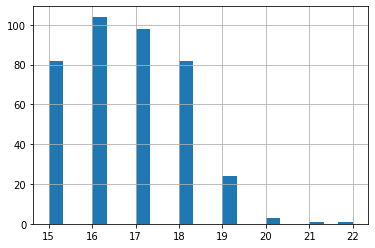

In [11]:
df.age.hist(bins=21)

Большинство студентов от 15 до 19 лет. Студенты с возрастом 21 и 22 года в единичном экземпляре. Проверим на выбросы и почистим.

In [12]:
c = 'age'
IQR = df[c].quantile(0.75) - df[c].quantile(0.25)
perc25 = df[c].quantile(0.25)
perc75 = df[c].quantile(0.75)
print(f'25-й перцентиль: {perc25},\n\
75-й перцентиль: {perc75},\n\
IQR: {IQR},\n\
Границы выбросов: [{perc25 - 1.5*IQR}, {perc75 + 1.5*IQR}]')
mask = ~df[c].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)
df.loc[mask, c] = np.nan

25-й перцентиль: 16.0,
75-й перцентиль: 18.0,
IQR: 2.0,
Границы выбросов: [13.0, 21.0]


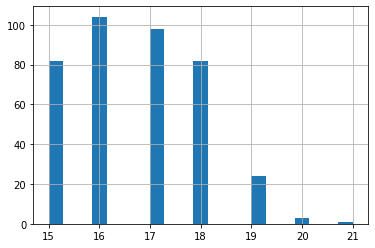

In [13]:
df.age.hist(bins=21)

## address 

In [14]:
df.address.value_counts(dropna=False)

U      295
R       83
NaN     17
Name: address, dtype: int64

Сделаем значения более наглядными

In [15]:
df.address = df.address.apply(
    lambda x: 'в городе' if x == 'U' else 'за городом' if x == 'R' else x)

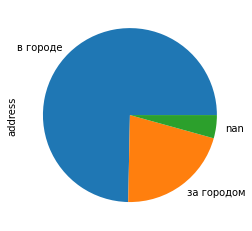

In [16]:
df.address.value_counts(dropna=False).plot.pie()

Столбец содержит тип адреса ученика ('U' - городской, 'R' - за городом).
Большинство учеников живут в городе.

## famsize 

In [17]:
df.famsize.value_counts(dropna=False)

GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64

Столбец содержит размер семьи('LE3' <= 3, 'GT3' >3). У большинства учеников семья содержит больше 3 человек. 

Сделаем значения более наглядными

In [18]:
df.famsize = df.famsize.apply(
    lambda x: 'больше 3' if x == 'GT3' else '3 или меньше' if x == 'LE3' else x)

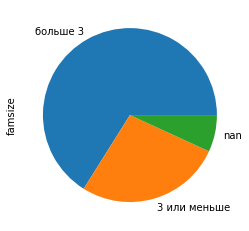

In [19]:
df.famsize.value_counts(dropna=False).plot.pie()

## pstatus 

In [20]:
df.pstatus.value_counts(dropna=False)

T      314
NaN     45
A       36
Name: pstatus, dtype: int64

Столбец содержит статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно). У большинства учеников родители живут вместе. У 45 учеников поле не заполенено.

Сделаем значения более наглядными

In [21]:
df.pstatus = df.pstatus.apply(
    lambda x: 'вместе' if x == 'T' else 'раздельно' if x == 'A' else x)

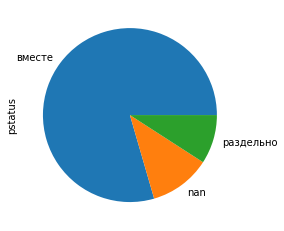

In [22]:
df.pstatus.value_counts(dropna=False).plot.pie()

## medu

In [23]:
df.medu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: medu, dtype: int64

Столбец содержит образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее).

Преобразуем цифровые значения в подробные текстовые

In [24]:
def edu_filter(e):
    if e < 0 or e > 4:
        return np.nan
    return e


def edu_mod(e):
    if e == 0:
        return 'нет'
    if e == 1:
        return '4 класса'
    if e == 2:
        return '5-9 классов'
    if e == 3:
        return 'среднее специальное'
    if e == 4:
        return 'высшее'
    return np.nan


df['medu'] = df['medu'].apply(edu_filter)

In [25]:
df.medu.value_counts(dropna=False, sort=True)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: medu, dtype: int64

## fedu 

In [26]:
df.fedu.value_counts(dropna=False, sort=True)

2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: fedu, dtype: int64

Столбец содержит образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). У 24 учеников поле не заполнено. Есть одно поле со значением "40", что не входит в список допустимых значений. Чтобы не строить теорий происхождения этого значения, будем его считать как еще один NaN.

Преобразуем цифровые значения в подробные текстовые

In [27]:
def edu_filter(e):
    if e < 0 or e > 4:
        return np.nan
    return e


df['fedu'] = df['fedu'].apply(edu_filter)

In [28]:
df.fedu.value_counts(dropna=False, sort=True)

2.0    106
3.0     96
4.0     88
1.0     78
NaN     25
0.0      2
Name: fedu, dtype: int64

## mjob

In [29]:
df.mjob.value_counts(dropna=False, sort=True)

other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: mjob, dtype: int64

Столбец содержит работу матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). 

## fjob 

In [30]:
df.fjob.value_counts(dropna=False, sort=True)

other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

Столбец содержит работу отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). 

## reason 

In [31]:
df.reason.value_counts(dropna=False, sort=True)

course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64

Столбец содержит причину выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). 

## guardian 

In [32]:
df.guardian.value_counts(dropna=False, sort=True)

mother    250
father     86
NaN        31
other      28
Name: guardian, dtype: int64

Столбец показывает кто опекун ученика ('mother' - мать, 'father' - отец, 'other' - другое). 

## traveltime 

In [33]:
df.traveltime.value_counts(dropna=False, sort=True)

1.0    242
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

Столбец показывает время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.). Есть незаполненные значения.

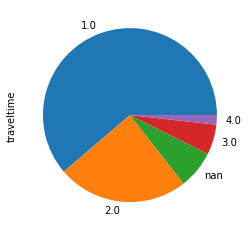

In [34]:
df.traveltime.value_counts(dropna=False).plot.pie()

большинство учеников живет рядом со школой

## studytime 

In [35]:
df.studytime.value_counts(dropna=False, sort=True)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

Столбец показывает время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

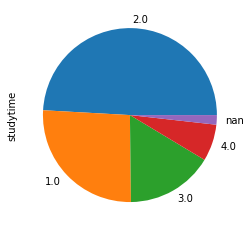

In [36]:
df.studytime.value_counts(dropna=False).plot.pie()

## failures 

In [37]:
df.failures.value_counts(dropna=False, sort=True)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     15
Name: failures, dtype: int64

Столбец показывает есть ли внеучебные неудачи (n, если 1<=n<=3, иначе 0). Есть пропущенные значения. Неверных значений нет.

## schoolsup

In [40]:
df.schoolsup.value_counts(dropna=False, sort=True)

no     335
yes     51
NaN      9
Name: schoolsup, dtype: int64

Столбец показывает есть ли дополнительная образовательная поддержка (yes или no)

## famsup 

In [41]:
df.famsup.value_counts(dropna=False, sort=True)

yes    219
no     137
NaN     39
Name: famsup, dtype: int64

Столбец показывает есть ли  семейная образовательная поддержка (yes или no)

## paid 

In [42]:
df.paid.value_counts(dropna=False, sort=True)

no     200
yes    155
NaN     40
Name: paid, dtype: int64

Столбец показывает есть ли дополнительные платные занятия по математике (yes или no)

## activities 

In [43]:
df.activities.value_counts(dropna=False, sort=True)

yes    195
no     186
NaN     14
Name: activities, dtype: int64

Столбец показывает есть ли дополнительные внеучебные занятия (yes или no)

## nursery 

In [44]:
df.nursery.value_counts(dropna=False, sort=True)

yes    300
no      79
NaN     16
Name: nursery, dtype: int64

Столбец показывает посещал ли ученик детский сад (yes или no)

## higher 

In [45]:
df.higher.value_counts(dropna=False, sort=True)

yes    356
NaN     20
no      19
Name: higher, dtype: int64

Столбец показывает  хочет ли ученик получить высшее образование (yes или no)

## internet 

In [46]:
df.internet.value_counts(dropna=False, sort=True)

yes    305
no      56
NaN     34
Name: internet, dtype: int64

Столбец показывает наличие интернета дома (yes или no)

##  romantic 

In [47]:
df.romantic.value_counts(dropna=False, sort=True)

no     240
yes    124
NaN     31
Name: romantic, dtype: int64

Столбец показывает в романтических ли  отношениях ученик (yes или no)

## famrel   

In [48]:
df.famrel.value_counts(dropna=False, sort=True)

 4.0    182
 5.0     99
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Столбец показывает  семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Проведем корректировку и уберем значения, которые не входят в заданный диапазон значений

In [49]:
def status_mod(s):
    if s > 0 and s < 6:
        return s
    return np.nan


df['famrel'] = df['famrel'].apply(status_mod)

In [50]:
df.famrel.value_counts(dropna=False, sort=True)

4.0    182
5.0     99
3.0     62
NaN     28
2.0     17
1.0      7
Name: famrel, dtype: int64

## freetime 

In [51]:
df.freetime.value_counts(dropna=False, sort=True)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

Столбец показывает свободное время после школы (от 1 - очень мало до 5 - очень мого)

## goout 

In [52]:
df.goout.value_counts(dropna=False, sort=True)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
NaN      8
Name: goout, dtype: int64

Столбец показывает проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

## health 

In [53]:
df.health.value_counts(dropna=False, sort=True)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
NaN     15
Name: health, dtype: int64

Столбец показывает текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

## absences 

In [54]:
df.absences.value_counts(dropna=False, sort=True)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


Столбец показывает количество пропущенных занятий

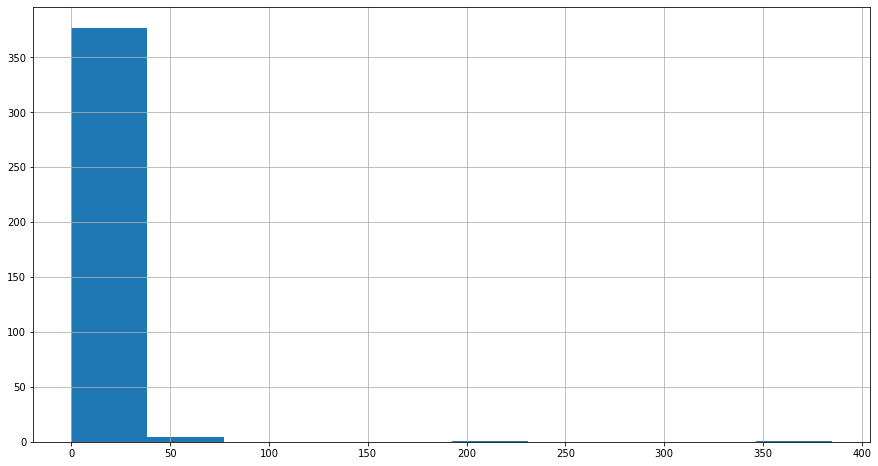

In [55]:
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
df.absences.hist(ax=ax)

Основной объем значений сосредоточен от 0 до 20. Присутствуют выбросы, так что будем фильтровать по IQR

In [56]:
c = 'absences'
IQR = df[c].quantile(0.75) - df[c].quantile(0.25)
perc25 = df[c].quantile(0.25)
perc75 = df[c].quantile(0.75)
print(f'25-й перцентиль: {perc25},\n\
75-й перцентиль: {perc75},\n\
IQR: {IQR},\n\
Границы выбросов: [{perc25 - 1.5*IQR}, {perc75 + 1.5*IQR}]')

# Здравый смысл подсказывает, что отрицательных пропусков быть не может. Таким образом, фильтруем от 0.

mask = ~df[c].between(0, perc75 + 1.5*IQR)
df.loc[mask, c] = np.nan

25-й перцентиль: 0.0,
75-й перцентиль: 8.0,
IQR: 8.0,
Границы выбросов: [-12.0, 20.0]


In [57]:
df.absences.value_counts(dropna=False, sort=True)

0.0     111
2.0      60
4.0      53
6.0      31
NaN      29
8.0      21
10.0     17
14.0     12
12.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64

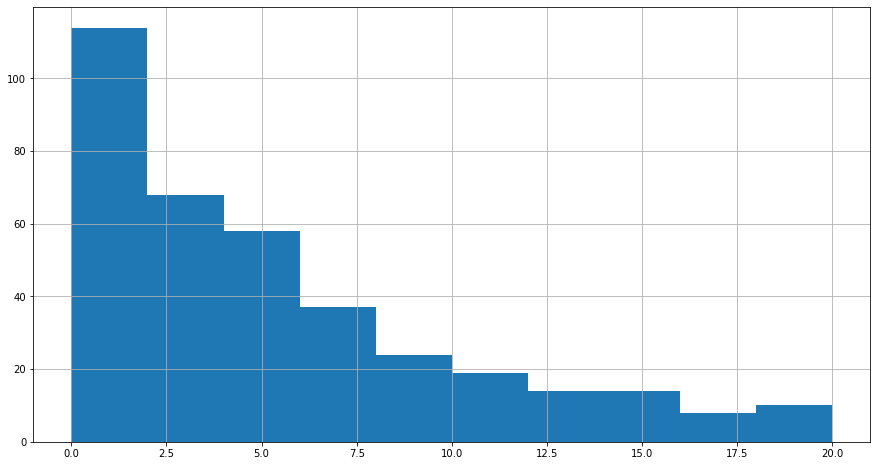

In [58]:
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
df.absences.hist(ax=ax)

## score 

In [59]:
df.score.value_counts(dropna=False, sort=True)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Столбец показывает баллы по госэкзамену по математике

## Выводы по данным

Данные представлены в виде excel файла. Имеются пропущенные и неверные значения. Недопустимые значения были удалены. В некоторый столбцах, описывающих номинальные характеристики, значения были заменены на более наглядные/информативные. Были найдены и отфильтрованы выбросы в столбцах "age" и "absences".


Посмотрим корреляцию цифровых параметров между собой

In [60]:
def field_filter(x):
    if df[x].dtype in ['int64', 'float64']:
        return True
    return False


def get_corr(dataframe, name):
    digit_columns = list(filter(field_filter, dataframe.columns))
    combinations_all = list(combinations(digit_columns, 2))
    corr = {}

    for c in combinations_all:
        col1 = dataframe[c[0]]
        col2 = dataframe[c[1]]
        corr[c] = col1.corr(other=col2)

    idx = pd.MultiIndex.from_tuples(corr.keys(), names=['A', 'B'])
    #corr = pd.Series(corr, index = idx).sort_values()
    corr = pd.DataFrame(list(corr.values()), index=idx,
                        columns=[name]).sort_values(by=name)
    return corr

In [61]:
corr = get_corr(df, 'general')

 Рассмотрим значимые пары

In [62]:
perc25 = (abs(corr.max()) + abs(corr.min())) * \
    0.125  # ((abs(a) + abs(b)) / 2) * 0.25
display(corr[(corr < -perc25) | (corr > perc25)].dropna())

general
A         B                   
failures  score      -0.344338
fedu      failures   -0.271936
medu      failures   -0.245463
studytime failures   -0.178992
medu      traveltime -0.173515
age       medu       -0.167883
fedu      traveltime -0.155459
age       score      -0.153518
          fedu       -0.147779
goout     score      -0.129685
studytime freetime   -0.121969
age       absences    0.129016
fedu      score       0.130002
famrel    freetime    0.164324
age       failures    0.195891
medu      score       0.213349
freetime  goout       0.296437
medu      fedu        0.629956

Оставив наиболее значимые пары параметров, между которыми существует наибольший уровень корреляции, можно увидеть, например, что на оценку влияет отсутствие неудач, а количество неудач уменьшается, если у матери и отца хорошее образование, а также при увеличении времени обучения

Найдем все параметры, связанные с оценкой ученика. Эти параметры в дальнейшем войдут в модель.

In [63]:
corr_fields = corr.iloc[corr.index.get_level_values(
    'B') == 'score'].index.get_level_values('A')
display(corr_fields)

Index(['failures', 'age', 'goout', 'traveltime', 'health', 'freetime',
       'famrel', 'absences', 'studytime', 'fedu', 'medu'],
      dtype='object', name='A')

Далее, посмотрим на зависимость оценки от характеристик:

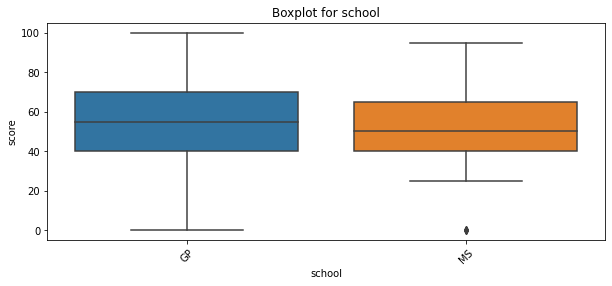

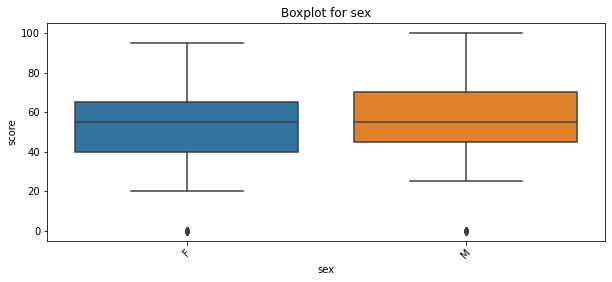

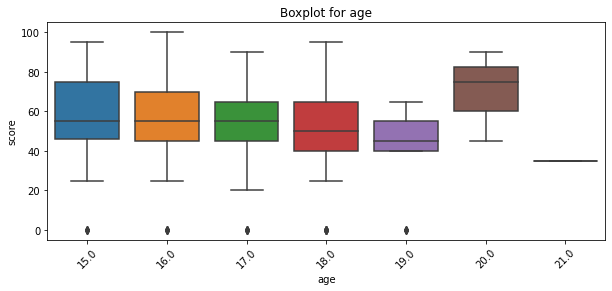

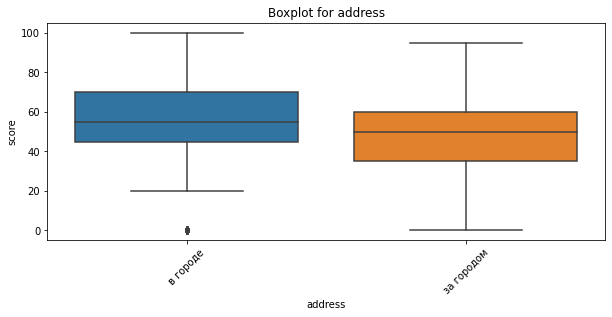

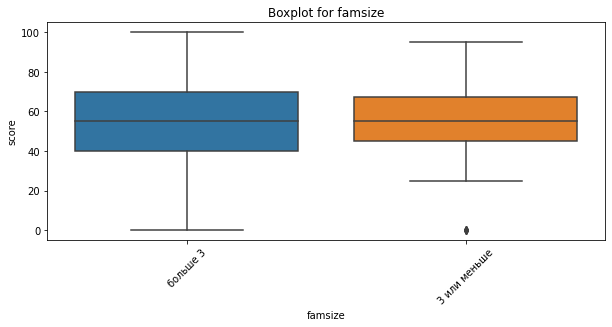

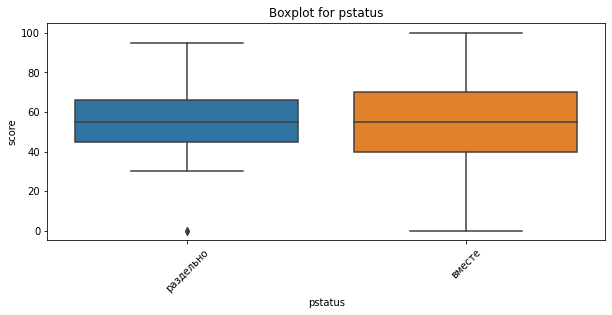

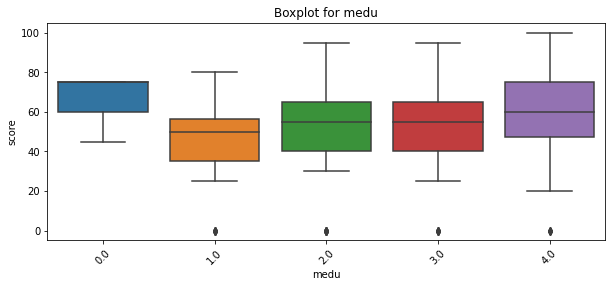

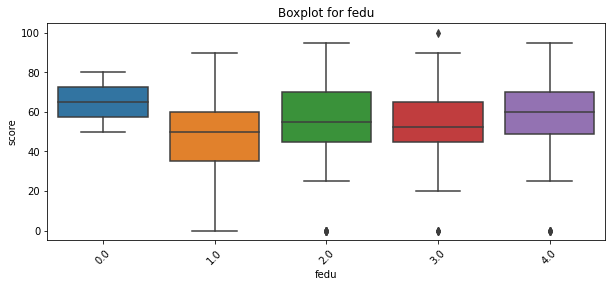

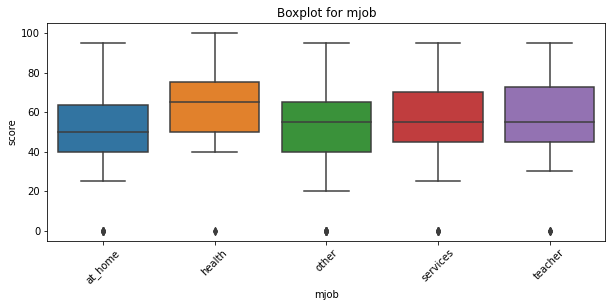

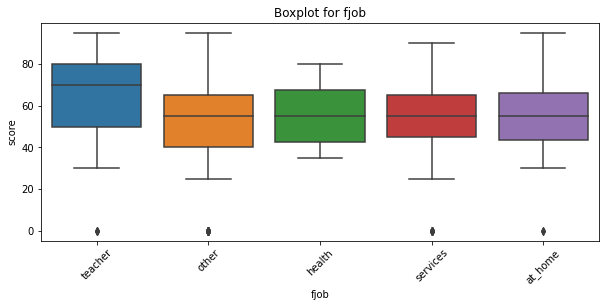

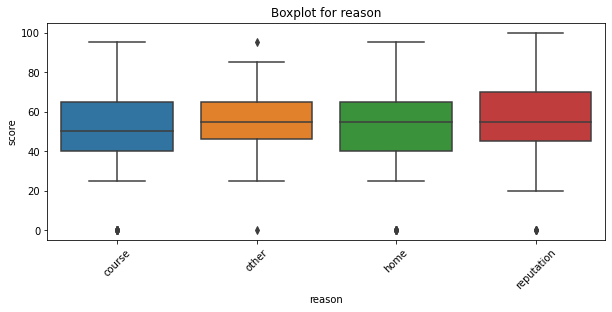

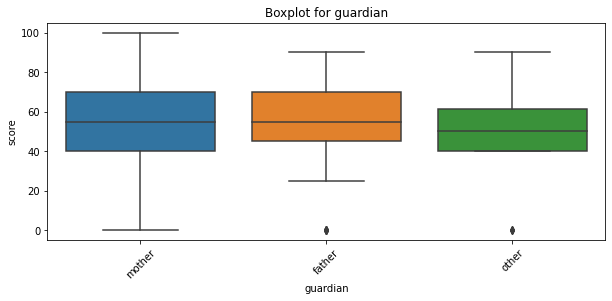

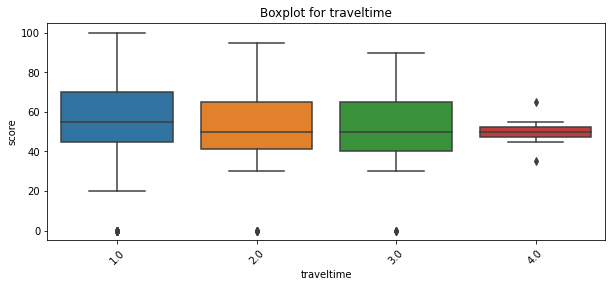

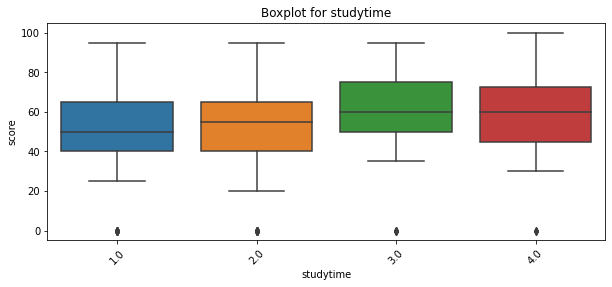

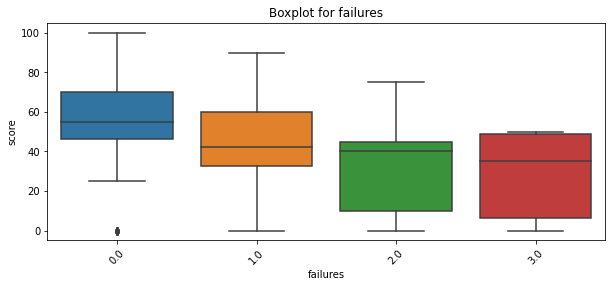

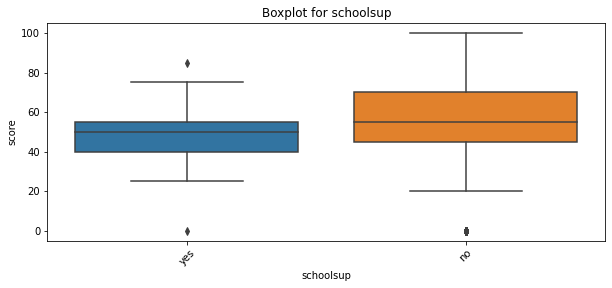

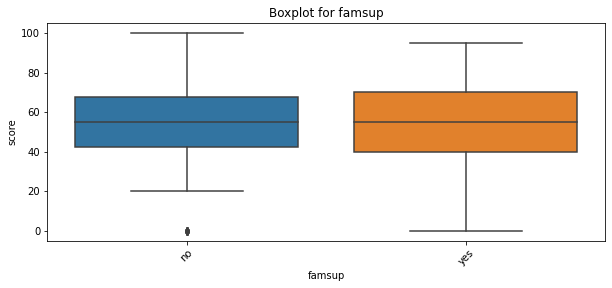

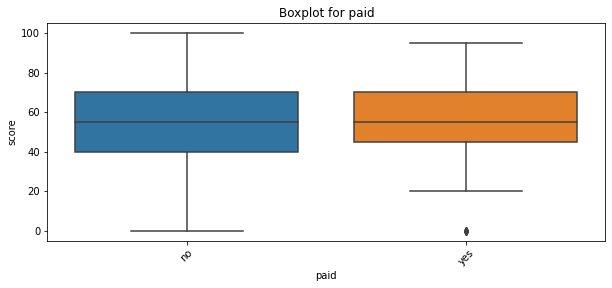

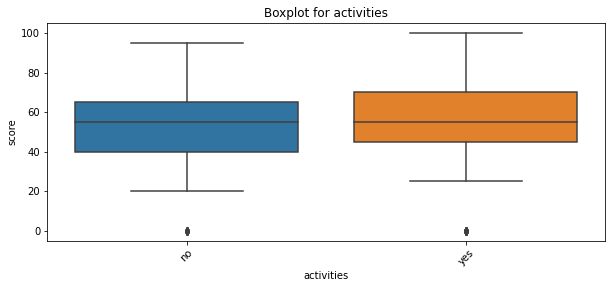

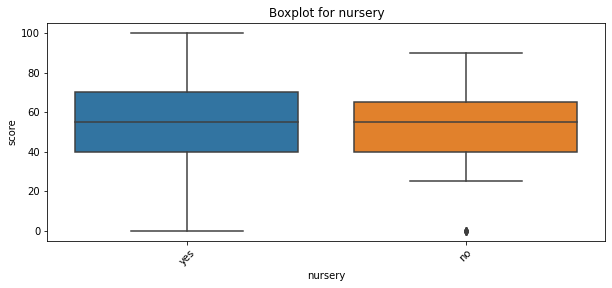

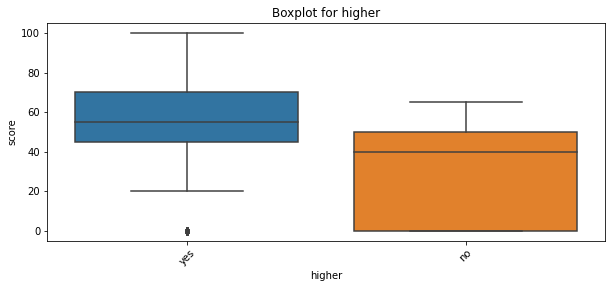

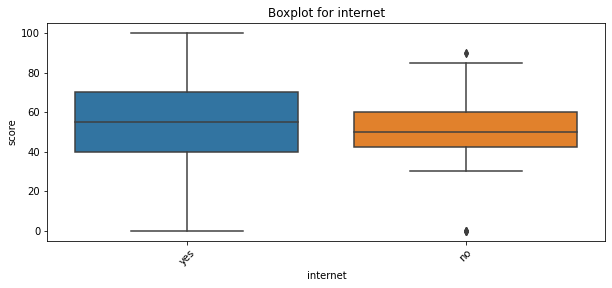

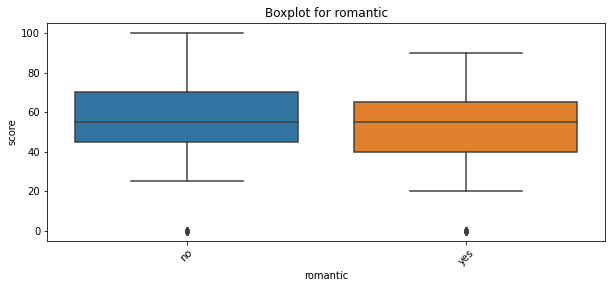

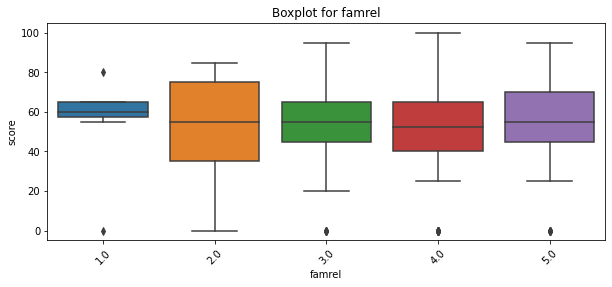

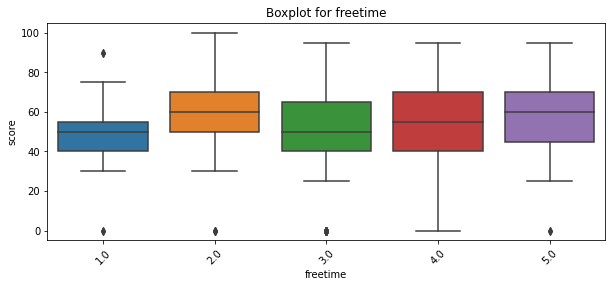

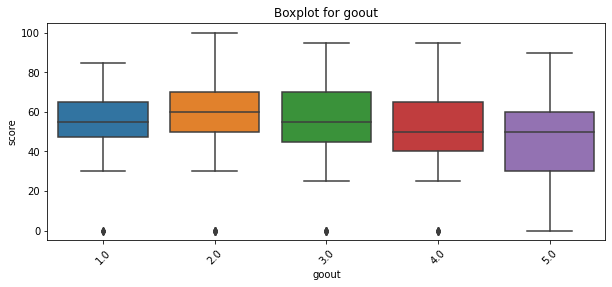

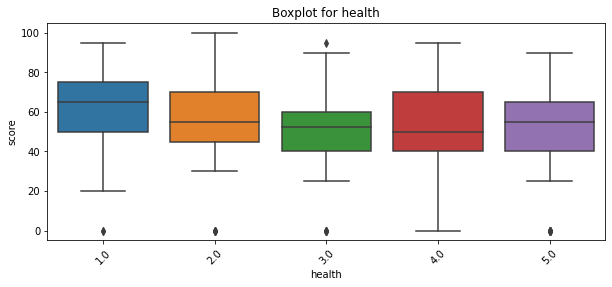

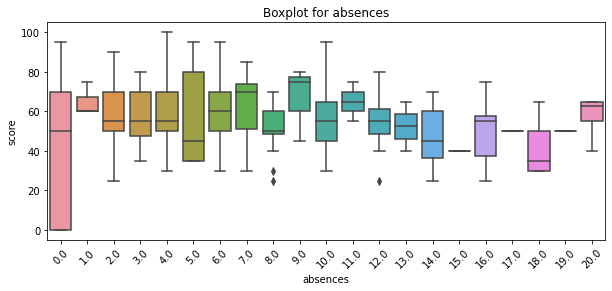

In [64]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in df.columns:
    if col == 'score':
        continue
    get_boxplot(col)

## Выводы по зависимостям

В школе MS нижний уровень оценок выше, чем в школе GP

Юноши учатся лучше девушек

До 18 лет возраст не оказывает значимого влияния на оценку, после 18 наблюдается снижение показателей.

Городские ученики, в среднем, чуть лучше живущих за городом.

Нижний уровень оценки в семье с одним ребенком выше, чем в большой семье

Нижний уровень оценки в случае раздельного проживания родителей выше, чем в случае совместного

Нижний уровень оценки в случае отсутствия образования у матери и/или отца выше, чем при любом ином образовании

Работа матери в области здравоохранения положительно сказывается на оценке ученика

Работа отца в области образования положительно сказывается на оценке ученика

Долгая дорога до школы негативно сказывается на оценке

Неудачи негативно сказываются на оценке

Дополнительная образовательная поддержка  негативно сказывается на оценке

Желание получить высшее образование положительно сказывается на оценке

Наличие интернета положительно сказывается на оценке

Плохие взаимоотношения в семье негативно сказываются на оценке

Отсутствие свободного времени негативно сказывается на оценке

Наличие небольшого количества пропусков не оказывает значительного влияния на оценку

##### Заполняем пропуски самыми частыми значениями столбца.

In [65]:
for c in df.columns:
    m = Counter(df[c]).most_common(1)[0][0]
    df[c] = df[c].fillna(m)

##### Выполняем Т-тест. 

Нулевая гипотеза - сравниваемые наборы параметров ученика одинаково влияют на итоговую оценку на экзамене. Если в результате получается значение р больше 0.05 мы не можем отбросить нулевую гипотезу о том, что оценка не зависит (зависит одинаково) от тестируемых параметров. Если же р меньше чем 0.05/m (m - количество гипотез (сумма пар параметров в столбце)), то нулевая гипотеза может быть отброшена и можно с математической точки зрения утверждать, что оценка зависит от данного параметра ученика.

Чем меньше р, тем больше влияние параметра на оценку ученика.

In [66]:
def do_ttest(dataframe):
    stats = {}
    # отключим вывод предупреждений
    import warnings
    warnings.filterwarnings('ignore')

    for c in dataframe.columns:
        if c == 'score':
            continue
        cols = dataframe.loc[:, c].value_counts().index
        combinations_all = list(combinations(cols, 2))
        for comb in combinations_all:
            c1 = dataframe.loc[dataframe.loc[:, c] == comb[0], 'score']
            c2 = dataframe.loc[dataframe.loc[:, c] == comb[1], 'score']
            #print(f"c1 : {comb[0]}: {c1.count()} ; c2 : {comb[1]}: {c2.count()}")
            t = ttest_ind(c1, c2).pvalue
            if t <= 0.05/len(combinations_all):  # Учли поправку Бонферони
                stats[c] = t
                #print(f'Найдены статистически значимые различия для колонки {column} : {t:.9f}')
                break
    ttest = pd.Series(stats).sort_values()
    return ttest

In [67]:
ttest = do_ttest(df)
display(ttest)

ttest_fields = ttest.index

failures    0.000002
higher      0.000246
medu        0.003682
mjob        0.004222
romantic    0.007309
address     0.016721
sex         0.049354
dtype: float64

## Выводы по статистике

По результатам теста Стьюдента видно, что в определении итоговой оценки ученика статистически значимыми параметрами  в убывающем по значимости порядке являются:

* failures    
* higher      
* medu        
* mjob        
* romantic    
* address     
* sex         

# Итоги

Объединим столбцы количественных и порядковых параметров, которые имеют наиболее значимый уровень корреляции с оценкой и статистически значимые параметры, полученные посте Т-теста. В результате получим список столбцов, значения которых в большей степени определяют оценку ученика и могут быть использованы при построения модели.

In [68]:
model_columns = list(dict.fromkeys(
    (corr_fields.tolist() + ttest_fields.tolist())))
display(model_columns)

['failures',
 'age',
 'goout',
 'traveltime',
 'health',
 'freetime',
 'famrel',
 'absences',
 'studytime',
 'fedu',
 'medu',
 'higher',
 'mjob',
 'romantic',
 'address',
 'sex']

Оставим в исходном наборе данных только значимые поля:

In [69]:
model_columns.append('score')
model = df.loc[:, model_columns]
model

,failures,age,goout,traveltime,health,freetime,famrel,absences,studytime,fedu,medu,higher,mjob,romantic,address,sex,score
0,0.0,18.0,4.0,2.0,3.0,3.0,4.0,6.0,2.0,4.0,4.0,yes,at_home,no,в городе,F,30.0
1,0.0,17.0,3.0,1.0,3.0,3.0,5.0,4.0,2.0,1.0,1.0,yes,at_home,no,в городе,F,30.0
2,3.0,15.0,2.0,1.0,3.0,3.0,4.0,10.0,2.0,1.0,1.0,yes,at_home,no,в городе,F,50.0
3,0.0,15.0,2.0,1.0,5.0,2.0,3.0,2.0,3.0,2.0,4.0,yes,health,yes,в городе,F,75.0
4,0.0,16.0,2.0,1.0,5.0,3.0,4.0,4.0,2.0,3.0,3.0,yes,other,no,в городе,F,50.0
5,0.0,16.0,2.0,1.0,5.0,4.0,5.0,10.0,2.0,3.0,4.0,yes,services,no,в городе,M,75.0
6,0.0,16.0,4.0,1.0,3.0,4.0,4.0,0.0,2.0,2.0,2.0,yes,other,no,в городе,M,55.0
7,0.0,17.0,4.0,2.0,1.0,1.0,4.0,6.0,2.0,4.0,4.0,yes,other,no,в городе,F,30.0
8,0.0,15.0,2.0,1.0,1.0,2.0,4.0,0.0,2.0,2.0,3.0,yes,services,no,в городе,M,95.0
9,0.0,15.0,1.0,1.0,5.0,5.0,5.0,0.0,2.0,4.0,3.0,yes,other,no,в городе,M,75.0
